Dataset preview:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


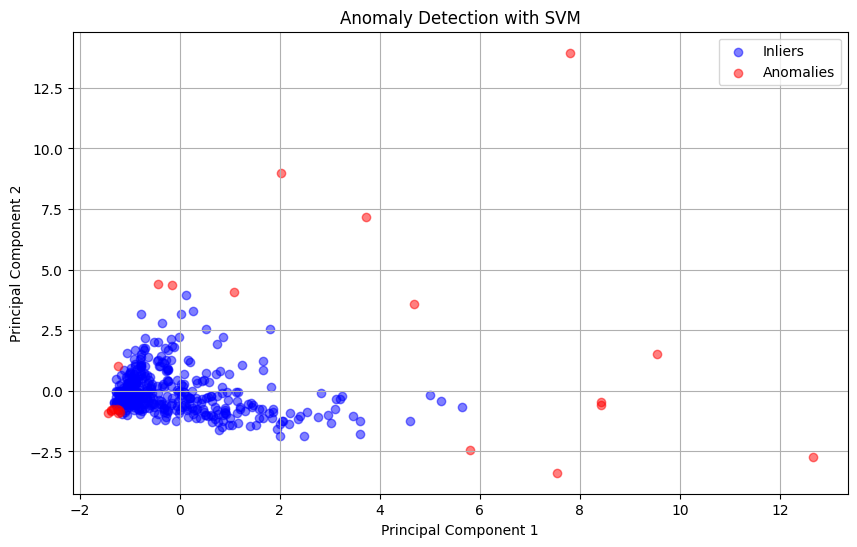


Anomalies detected:
     Channel  Region   Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
23         2       3   26373  36423    22019    5154              4337   
47         2       3   44466  54259    55571    7782             24171   
61         2       3   35942  38369    59598    3254             26701   
65         2       3      85  20959    45828      36             24231   
85         2       3   16117  46197    92780    1026             40827   
86         2       3   22925  73498    32114     987             20070   
87         1       3   43265   5025     8117    6312              1579   
93         1       3   11314   3090     2062   35009                71   
97         1       3     403    254      610     774                54   
98         1       3     503    112      778     895                56   
125        1       3   76237   3473     7102   16538               778   
131        1       3    2101    589      314     346                70   
154        1     

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import OneClassSVM
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
file_path = 'customers.csv'  # Update the path if needed
data = pd.read_csv(file_path)

# Display first few rows of data
print("Dataset preview:")
print(data.head())

# Selecting relevant features and standardizing
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']  # Adjust based on dataset
X = data[features]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize One-Class SVM for anomaly detection
svm_model = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.05)  # Adjust gamma and nu as needed
svm_model.fit(X_scaled)

# Predict anomalies (-1) and inliers (1)
predictions = svm_model.predict(X_scaled)

# Adding predictions to the dataset
data['Anomaly'] = np.where(predictions == -1, 'Anomaly', 'Inlier')

# Reduce data to 2D for visualization using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(
    X_reduced[predictions == 1, 0], X_reduced[predictions == 1, 1],
    c='blue', label='Inliers', alpha=0.5
)
plt.scatter(
    X_reduced[predictions == -1, 0], X_reduced[predictions == -1, 1],
    c='red', label='Anomalies', alpha=0.5
)
plt.title('Anomaly Detection with SVM')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Output the anomalies
anomalies = data[data['Anomaly'] == 'Anomaly']
print("\nAnomalies detected:")
print(anomalies)

# Save output if needed
data.to_csv("SVM_anomalies_output.csv", index=False)
print("\nAnomaly detection results saved as 'SVM_anomalies_output.csv'")
